# 고객 분류 (Kmeans)
## Supervised Learning & Unsupervised Learning


- Supervised Learning => classification, Regression
- Unsupervised Learning => clustering, Dimensionality Reduction

- K-Means Clustering
K-Means 알고리즘은 가장 유명한 클러스터링 알고리즘입니다. “K”는 주어진 데이터로부터 그룹화 할 그룹, 즉 클러스터의 수를 말합니다. “Means”는 각 클러스터의 중심과 데이터들의 평균 거리를 의미합니다. 이 때 클러스터의 중심을 centroids 라고 합니다.

K-Means 알고리즘은 다음과 같은 과정으로 수행됩니다.

1.데이터셋에서 K 개의 centroids를 임의로 지정합니다.

2.각 데이터들을 가장 가까운 centroids가 속한 그룹에 할당합니다.

3.2번 과정에서 할당된 결과를 바탕으로 centroids를 새롭게 지정합니다.

4.2 ~ 3번 과정을 centroids가 더 이상 변하지 않을 때 까지 반복합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs #data를 만들수 있는 function을 import하기 

In [16]:
data = make_blobs(n_samples = 200, n_features=2, centers = 4, random_state = 100) #n_samples  총 몇개의 데이터가 들어갈지 정한다,n_features 독립변수 숫자를 정한다,centers 특정그룹으로 나눈다(숫자에 따라)  

In [17]:
data

(array([[-1.04541152e+01, -7.62125255e+00],
        [-1.00696483e+01, -6.35203699e+00],
        [-9.72925240e+00, -8.44434843e+00],
        [-9.53601173e+00, -8.04924975e+00],
        [-3.00736857e+00,  5.70163667e+00],
        [-1.00825197e+01, -7.06157008e+00],
        [ 1.48356884e+00,  6.54127044e+00],
        [ 1.36630977e+00,  7.30084118e+00],
        [-6.15050479e-01,  7.65521577e+00],
        [-2.13385599e-01,  7.84779827e+00],
        [ 3.36818459e-01, -3.40287961e+00],
        [-1.37722038e+00,  6.91773657e+00],
        [-1.08726796e+00,  5.80147972e+00],
        [-1.63584937e+00,  8.88579630e+00],
        [-7.62592530e-01,  7.32519908e+00],
        [-1.93336328e+00,  5.70953908e+00],
        [-9.51418426e+00, -7.24137223e+00],
        [-9.86650380e-01,  6.87917724e+00],
        [-9.37825374e+00, -7.94292047e+00],
        [ 2.66345400e-01,  7.40859703e+00],
        [-1.20385333e+01, -6.80941325e+00],
        [-9.20343837e+00, -8.85252239e+00],
        [ 4.10071850e-01, -3.997

In [18]:
data[0] #독립변수 값 나온다

array([[-1.04541152e+01, -7.62125255e+00],
       [-1.00696483e+01, -6.35203699e+00],
       [-9.72925240e+00, -8.44434843e+00],
       [-9.53601173e+00, -8.04924975e+00],
       [-3.00736857e+00,  5.70163667e+00],
       [-1.00825197e+01, -7.06157008e+00],
       [ 1.48356884e+00,  6.54127044e+00],
       [ 1.36630977e+00,  7.30084118e+00],
       [-6.15050479e-01,  7.65521577e+00],
       [-2.13385599e-01,  7.84779827e+00],
       [ 3.36818459e-01, -3.40287961e+00],
       [-1.37722038e+00,  6.91773657e+00],
       [-1.08726796e+00,  5.80147972e+00],
       [-1.63584937e+00,  8.88579630e+00],
       [-7.62592530e-01,  7.32519908e+00],
       [-1.93336328e+00,  5.70953908e+00],
       [-9.51418426e+00, -7.24137223e+00],
       [-9.86650380e-01,  6.87917724e+00],
       [-9.37825374e+00, -7.94292047e+00],
       [ 2.66345400e-01,  7.40859703e+00],
       [-1.20385333e+01, -6.80941325e+00],
       [-9.20343837e+00, -8.85252239e+00],
       [ 4.10071850e-01, -3.99744881e+00],
       [ 2.

In [19]:
data[1] #종속변수 값 나온다

array([2, 2, 2, 2, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       0, 3, 0, 0, 1, 2, 1, 0, 0, 3, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 3,
       0, 3, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, 3, 3, 2, 0, 3, 2, 3,
       1, 2, 3, 2, 3, 1, 3, 2, 3, 2, 0, 3, 3, 2, 3, 0, 2, 2, 0, 3, 1, 0,
       1, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 2, 3, 1, 0, 3, 1, 1, 0, 0, 3, 1,
       1, 0, 3, 1, 3, 0, 1, 3, 2, 2, 2, 3, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0,
       0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 2, 0, 2,
       2, 0, 1, 1, 3, 1, 3, 3, 3, 1, 2, 3, 2, 0, 0, 1, 3, 1, 3, 1, 0, 1,
       1, 3, 2, 2, 3, 3, 1, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1, 1, 2,
       3, 0])

In [20]:
data[0][:,0] 

array([-1.04541152e+01, -1.00696483e+01, -9.72925240e+00, -9.53601173e+00,
       -3.00736857e+00, -1.00825197e+01,  1.48356884e+00,  1.36630977e+00,
       -6.15050479e-01, -2.13385599e-01,  3.36818459e-01, -1.37722038e+00,
       -1.08726796e+00, -1.63584937e+00, -7.62592530e-01, -1.93336328e+00,
       -9.51418426e+00, -9.86650380e-01, -9.37825374e+00,  2.66345400e-01,
       -1.20385333e+01, -9.20343837e+00,  4.10071850e-01,  2.25174587e+00,
        7.92075370e-01,  5.41860777e-01, -7.56585997e-01, -8.95266345e+00,
       -1.68442974e+00,  1.48113772e+00,  8.75413399e-01,  3.00989843e+00,
        9.76962304e-01, -9.94328955e+00, -9.79380030e+00, -1.37939973e+00,
       -2.10521664e+00,  4.29963213e-01, -1.01724010e+01, -1.40787241e+00,
       -8.86329013e+00, -1.17867375e+01,  2.70003492e+00,  3.74018799e+00,
        9.76970826e-01,  3.53853432e+00, -1.36995537e-02, -2.21406638e+00,
        1.54081964e+00, -9.78801442e+00, -9.88043097e+00,  1.44867217e+00,
       -1.04422633e+01,  

<AxesSubplot:>

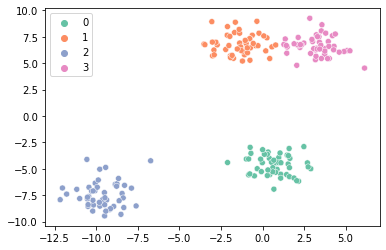

In [23]:
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue= data[1], palette='Set2')

In [24]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans(n_clusters = 4)

In [27]:
model.fit(data[0])

KMeans(n_clusters=4)

In [28]:
model.labels_

array([1, 1, 1, 1, 3, 1, 0, 0, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1,
       2, 0, 2, 2, 3, 1, 3, 2, 2, 0, 2, 1, 1, 3, 2, 2, 1, 3, 1, 1, 2, 0,
       2, 0, 2, 3, 2, 1, 1, 2, 1, 2, 1, 2, 2, 3, 0, 0, 0, 1, 2, 0, 1, 0,
       3, 1, 0, 1, 0, 3, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 3, 2,
       3, 2, 0, 1, 3, 2, 1, 1, 2, 0, 3, 1, 0, 3, 2, 0, 3, 3, 2, 2, 0, 3,
       3, 2, 0, 3, 0, 2, 3, 0, 1, 1, 1, 0, 2, 1, 1, 2, 3, 2, 3, 3, 3, 2,
       2, 0, 2, 1, 3, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 1, 2, 1,
       1, 2, 3, 3, 0, 3, 0, 0, 0, 3, 1, 0, 1, 2, 2, 3, 0, 3, 0, 3, 2, 3,
       3, 0, 1, 1, 0, 0, 3, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 3, 3, 1,
       0, 2])

In [29]:
data[1]

array([2, 2, 2, 2, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       0, 3, 0, 0, 1, 2, 1, 0, 0, 3, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 3,
       0, 3, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, 3, 3, 2, 0, 3, 2, 3,
       1, 2, 3, 2, 3, 1, 3, 2, 3, 2, 0, 3, 3, 2, 3, 0, 2, 2, 0, 3, 1, 0,
       1, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 2, 3, 1, 0, 3, 1, 1, 0, 0, 3, 1,
       1, 0, 3, 1, 3, 0, 1, 3, 2, 2, 2, 3, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0,
       0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 2, 0, 2,
       2, 0, 1, 1, 3, 1, 3, 3, 3, 1, 2, 3, 2, 0, 0, 1, 3, 1, 3, 1, 0, 1,
       1, 3, 2, 2, 3, 3, 1, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1, 1, 2,
       3, 0])

<AxesSubplot:>

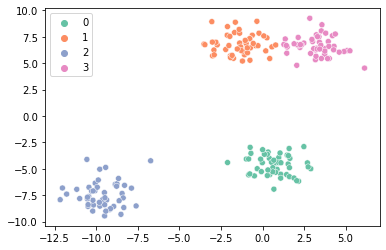

In [30]:
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue= data[1], palette='Set2')

<AxesSubplot:>

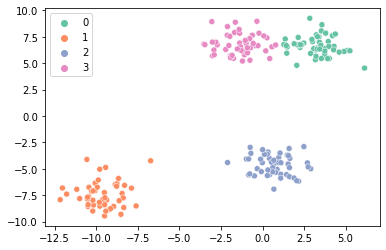

In [31]:
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue= model.labels_, palette='Set2')

In [32]:
model = KMeans(n_clusters =3)

In [33]:
model.fit(data[0])

KMeans(n_clusters=3)

<AxesSubplot:>

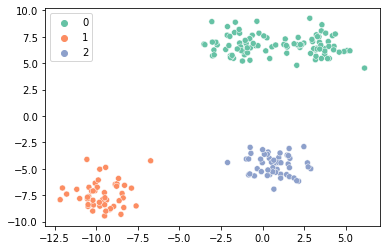

In [34]:
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue= model.labels_, palette='Set2')

<AxesSubplot:>

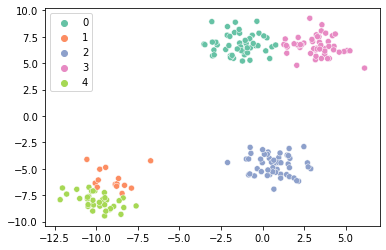

In [35]:
model = KMeans(n_clusters =5)
model.fit(data[0])
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue= model.labels_, palette='Set2')

In [37]:
model.inertia_

377.0923630431555

In [40]:
distance = []
for i in range(2, 11):
    model = KMeans(n_clusters =i)
    model.fit(data[0])
    distance.append(model.inertia_)

In [41]:
distance #n_clusters 커질수록 model.inertia_ 작아진다

[3855.3908583820526,
 967.5329197924485,
 428.6910143243812,
 377.0923630431555,
 330.8526632471694,
 302.2785484894927,
 269.6629305948995,
 241.91928073702698,
 212.5954368950558]

<AxesSubplot:>

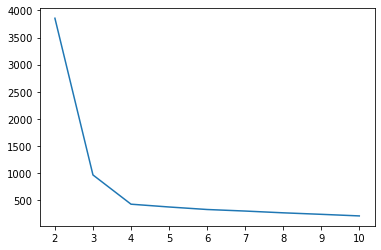

In [42]:
sns.lineplot(x=list(range(2,11)),y=distance)

- 2에서 3으로 갈때 inertia_ 작아짐 (굉장히 효율이 좋다)
- 4 이상은 별로 차이가 없으므로 4가 제일 효율적이다